In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

In [2]:
fertility = pd.read_csv("data/age_specific_fertility_rates.csv")
birth_death = pd.read_csv("data/birth_death_growth_rates.csv") 
country_area = pd.read_csv("data/country_names_area.csv")
midyear_pop_5yrs = pd.read_csv("data/midyear_population_5yr_age_sex.csv")
mortality_life = pd.read_csv("data/mortality_life_expectancy.csv")
midyear_population = pd.read_csv("data/midyear_population.csv")

In [3]:
country_area

,country_code,country_name,country_area
0,AF,Afghanistan,652230.0
1,AL,Albania,27398.0
2,AG,Algeria,2381741.0
3,AQ,American Samoa,199.0
4,AN,Andorra,468.0
...,...,...,...
223,WE,West Bank,5640.0
224,WI,Western Sahara,266000.0
225,YM,Yemen,527968.0
226,ZA,Zambia,743398.0


In [4]:
midyear_pop_5yrs = midyear_pop_5yrs[midyear_pop_5yrs['total_flag'] != '*'] #removing rows that have total/summed values
midyear_pop_5yrs

,country_code,country_name,year,total_flag,starting_age,age_group_indicator,ending_age,midyear_population,midyear_population_male,midyear_population_female
0,NO,Norway,2036,A,0,-,4,324151,166113,158038
1,EG,Egypt,2021,A,100,+,0,327,117,210
2,SN,Singapore,2042,A,90,-,94,102198,40128,62070
3,ZI,Zimbabwe,2005,A,85,-,89,19925,9055,10870
4,SI,Slovenia,2035,A,0,-,4,67365,34744,32621
...,...,...,...,...,...,...,...,...,...,...
333075,DO,Dominica,2005,A,30,-,34,4483,2257,2226
333076,SO,Somalia,1990,A,55,-,59,141082,66376,74706
333077,BT,Bhutan,2024,A,80,-,84,7094,3576,3518
333078,NS,Suriname,2021,A,60,-,64,22898,11210,11688


In [5]:
#midyear_population

### Combining Population Data ###
#### yearly_midyear_pop and midyear_pop_5yrs ####

In [6]:
#replacing column name 
#midyear_population.rename(columns={'midyear_population': 'yearly_midyear_pop'}, inplace=True)

# merge country_area w/ midyear_pop
population_data = pd.merge(midyear_pop_5yrs, country_area, on=["country_code", "country_name"], how="inner")
print(population_data.shape)
print(population_data.isnull().sum())
print(population_data.isna().sum())

(317940, 11)
country_code                 0
country_name                 0
year                         0
total_flag                   0
starting_age                 0
age_group_indicator          0
ending_age                   0
midyear_population           0
midyear_population_male      0
midyear_population_female    0
country_area                 0
dtype: int64
country_code                 0
country_name                 0
year                         0
total_flag                   0
starting_age                 0
age_group_indicator          0
ending_age                   0
midyear_population           0
midyear_population_male      0
midyear_population_female    0
country_area                 0
dtype: int64


In [7]:
# merge w/ midyear 5 yrs
#population_data2 = pd.merge(midyear_pop_5yrs, country_area, on=["country_code", "country_name", "year"], how="inner")
#print(population_data2.shape)
#print(population_data2.isnull().sum())
#print(population_data2.isna().sum())

In [8]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80', '80-100+']

# Taking out the summed age rows
population_data2 = population_data[population_data['total_flag'] != '*']

# Adding new column for groups
population_data2.loc[:, 'age_group'] = pd.cut(population_data2[population_data2['ending_age'] != 0]['ending_age'],
                                              bins=age_bins, labels=age_labels, right=False)

aggregated_data = population_data2.groupby(['country_code', 'country_name', 'year', 'age_group']).agg({
    'midyear_population': 'sum',
    'midyear_population_male': 'sum',
    'midyear_population_female': 'sum'
    
}).reset_index()

In [9]:
print(aggregated_data.shape)
print(aggregated_data.isnull().sum())
print(aggregated_data.isna().sum())

(26251920, 7)
country_code                 0
country_name                 0
year                         0
age_group                    0
midyear_population           0
midyear_population_male      0
midyear_population_female    0
dtype: int64
country_code                 0
country_name                 0
year                         0
age_group                    0
midyear_population           0
midyear_population_male      0
midyear_population_female    0
dtype: int64


In [10]:
final_population_data = pd.merge(aggregated_data, 
                                 population_data2[['country_code', 
                                                  'country_name', 
                                                  'year', 
                                                   'country_area'
                                                  ]].drop_duplicates(), #'country_area'
                                 
                                 on=['country_code', 
                                     'country_name', 
                                     'year'], 
                                 
                                 how='inner')

In [11]:
#Creating new region column, mapping country_name to new 'region'
#Asia', 'Caribbean', 'Central America', 'Europe', 'North America','Oceania', 'South America', Africa and Middle East
country_region_map = {
    'Aruba': 'Caribbean',
    'Antigua and Barbuda': 'Caribbean',
    'United Arab Emirates': 'Asia',
    'Afghanistan': 'Africa and Middle East',
    'Algeria': 'Africa and Middle East',
    'Azerbaijan': 'Asia',
    'Albania': 'Europe',
    'Armenia': 'Asia',
    'Andorra': 'Europe',
    'Angola': 'Africa and Middle East',
    'American Samoa': 'Oceania',
    'Argentina': 'South America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Anguilla': 'Caribbean',
    'Bahrain': 'Asia',
    'Barbados': 'Caribbean',
    'Botswana': 'Africa and Middle East',
    'Bermuda': 'North America',
    'Belgium': 'Europe',
    'Bahamas The': 'Caribbean',
    'Bangladesh': 'Asia',
    'Belize': 'Central America',
    'Bosnia and Herzegovina': 'Europe',
    'Bolivia': 'South America',
    'Burma': 'Asia',
    'Benin': 'Africa and Middle East',
    'Belarus': 'Europe',
    'Solomon Islands': 'Oceania',
    'Brazil': 'South America',
    'Bhutan': 'Asia',
    'Bulgaria': 'Europe',
    'Brunei': 'Asia',
    'Burundi': 'Africa and Middle East',
    'Canada': 'North America',
    'Cambodia': 'Asia',
    'Chad': 'Africa and Middle East',
    'Sri Lanka': 'Asia',
    'Congo (Brazzaville)': 'Africa and Middle East',
    'Congo (Kinshasa)': 'Africa and Middle East',
    'China': 'Asia',
    'Chile': 'South America',
    'Cayman Islands': 'Caribbean',
    'Cameroon': 'Africa and Middle East',
    'Comoros': 'Africa and Middle East',
    'Colombia': 'South America',
    'Northern Mariana Islands': 'Oceania',
    'Costa Rica': 'Central America',
    'Central African Republic': 'Africa and Middle East',
    'Cuba': 'Caribbean',
    'Cabo Verde': 'Africa and Middle East',
    'Cook Islands': 'Oceania',
    'Cyprus': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa and Middle East',
    'Dominica': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Ecuador': 'South America',
    'Egypt': 'Africa and Middle East',
    'Ireland': 'Europe',
    'Equatorial Guinea': 'Africa and Middle East',
    'Estonia': 'Europe',
    'Eritrea': 'Africa and Middle East',
    'El Salvador': 'Central America',
    'Ethiopia': 'Africa and Middle East',
    'Czechia': 'Europe',
    'Finland': 'Europe',
    'Fiji': 'Oceania',
    'Micronesia Federated States of': 'Oceania',
    'Faroe Islands': 'Europe',
    'French Polynesia': 'Oceania',
    'France': 'Europe',
    'Gambia The': 'Africa and Middle East',
    'Gabon': 'Africa and Middle East',
    'Georgia': 'Asia',
    'Ghana': 'Africa and Middle East',
    'Gibraltar': 'Europe',
    'Grenada': 'Caribbean',
    'Guernsey': 'Europe',
    'Greenland': 'North America',
    'Germany': 'Europe',
    'Guam': 'Oceania',
    'Greece': 'Europe',
    'Guatemala': 'Central America',
    'Guinea': 'Africa and Middle East',
    'Guyana': 'South America',
    'Gaza Strip': 'Africa and Middle East',
    'Haiti': 'Caribbean',
    'Hong Kong': 'Asia',
    'Honduras': 'Central America',
    'Croatia': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Indonesia': 'Asia',
    'Isle of Man': 'Europe',
    'India': 'Asia',
    'Iran': 'Asia',
    'Israel': 'Africa and Middle East',
    'Italy': 'Europe',
    "Cote d'Ivoire": 'Africa and Middle East',
    'Iraq': 'Africa and Middle East',
    'Japan': 'Asia',
    'Jersey': 'Europe',
    'Jamaica': 'Caribbean',
    'Jordan': 'Africa and Middle East',
    'Kenya': 'Africa and Middle East',
    'Kyrgyzstan': 'Asia',
    'Korea North': 'Asia',
    'Kiribati': 'Oceania',
    'Korea South': 'Asia',
    'Kuwait': 'Asia',
    'Kosovo': 'Europe',
    'Kazakhstan': 'Asia',
    'Laos': 'Asia',
    'Lebanon': 'Africa and Middle East',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Liberia': 'Africa and Middle East',
    'Slovakia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lesotho': 'Africa and Middle East',
    'Luxembourg': 'Europe',
    'Libya': 'Africa and Middle East',
    'Madagascar': 'Africa and Middle East',
    'Macau': 'Asia',
    'Moldova': 'Europe',
    'Mongolia': 'Asia',
    'Montserrat': 'Caribbean',
    'Malawi': 'Africa and Middle East',
    'Montenegro': 'Europe',
    'Macedonia': 'Europe',
    'Mali': 'Africa and Middle East',
    'Monaco': 'Europe',
    'Morocco': 'Africa and Middle East',
    'Mauritius': 'Africa and Middle East',
    'Mauritania': 'Africa and Middle East',
    'Malta': 'Europe',
    'Oman': 'Asia',
    'Maldives': 'Asia',
    'Mexico': 'North America',
    'Malaysia': 'Asia',
    'Mozambique': 'Africa and Middle East',
    'New Caledonia': 'Oceania',
    'Niger': 'Africa and Middle East',
    'Vanuatu': 'Oceania',
    'Nigeria': 'Africa and Middle East',
    'Netherlands': 'Europe',
    'Sint Maarten': 'Caribbean',
    'Norway': 'Europe',
    'Nepal': 'Asia',
    'Nauru': 'Oceania',
    'Suriname': 'South America',
    'Nicaragua': 'Central America',
    'New Zealand': 'Oceania',
    'South Sudan': 'Africa and Middle East',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Pakistan': 'Asia',
    'Poland': 'Europe',
    'Panama': 'Central America',
    'Portugal': 'Europe',
    'Papua New Guinea': 'Oceania',
    'Palau': 'Oceania',
    'Guinea-Bissau': 'Africa and Middle East',
    'Qatar': 'Asia',
    'Serbia': 'Europe',
    'Marshall Islands': 'Oceania',
    'Saint Martin': 'Caribbean',
    'Romania': 'Europe',
    'Philippines': 'Asia',
    'Puerto Rico': 'Caribbean',
    'Russia': 'Europe',
    'Rwanda': 'Africa and Middle East',
    'Saudi Arabia': 'Asia',
    'Saint Pierre and Miquelon': 'North America',
    'Saint Kitts and Nevis': 'Caribbean',
    'Seychelles': 'Africa and Middle East',
    'South Africa': 'Africa and Middle East',
    'Senegal': 'Africa and Middle East',
    'Saint Helena': 'Africa and Middle East',
    'Slovenia': 'Europe',
    'Sierra Leone': 'Africa and Middle East',
    'San Marino': 'Europe',
    'Singapore': 'Asia',
    'Somalia': 'Africa and Middle East',
    'Spain': 'Europe',
    'Saint Lucia': 'Caribbean',
    'Sudan': 'Africa and Middle East',
    'Sweden': 'Europe',
    'Syria': 'Africa and Middle East',
    'Switzerland': 'Europe',
    'Saint Barthelemy': 'Caribbean',
    'Trinidad and Tobago': 'Caribbean',
    'Thailand': 'Asia',
    'Tajikistan': 'Asia',
    'Turks and Caicos Islands': 'Caribbean',
    'Tonga': 'Oceania',
    'Togo': 'Africa and Middle East',
    'Sao Tome and Principe': 'Africa and Middle East',
    'Tunisia': 'Africa and Middle East',
    'Timor-Leste': 'Asia',
    'Turkey': 'Europe',
    'Tuvalu': 'Oceania',
    'Taiwan': 'Asia',
    'Turkmenistan': 'Asia',
    'Tanzania': 'Africa and Middle East',
    'Curacao': 'Caribbean',
    'Uganda': 'Africa and Middle East',
    'United Kingdom': 'Europe',
    'Ukraine': 'Europe',
    'United States': 'North America',
    'Burkina Faso': 'Africa and Middle East',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Saint Vincent and the Grenadines': 'Caribbean',
    'Venezuela': 'South America',
    'Virgin Islands British': 'Caribbean',
    'Vietnam': 'Asia',
    'Virgin Islands U.S.': 'Caribbean',
    'Namibia': 'Africa and Middle East',
    'West Bank': 'Africa and Middle East',
    'Wallis and Futuna': 'Oceania',
    'Western Sahara': 'Africa and Middle East',
    'Samoa': 'Oceania',
    'Swaziland': 'Africa and Middle East',
    'Yemen': 'Africa and Middle East',
    'Zambia': 'Africa and Middle East',
    'Zimbabwe': 'Africa and Middle East'
}

In [12]:
final_population_data['region'] = final_population_data['country_name'].map(country_region_map)
final_population_data['population_density'] = final_population_data['midyear_population'] / final_population_data['country_area']

In [13]:
print(final_population_data.shape)
print(final_population_data.isnull().sum())
print(final_population_data.isna().sum())

(75700, 10)
country_code                 0
country_name                 0
year                         0
age_group                    0
midyear_population           0
midyear_population_male      0
midyear_population_female    0
country_area                 0
region                       0
population_density           0
dtype: int64
country_code                 0
country_name                 0
year                         0
age_group                    0
midyear_population           0
midyear_population_male      0
midyear_population_female    0
country_area                 0
region                       0
population_density           0
dtype: int64


In [14]:
print(final_population_data)

      country_code country_name  year age_group  midyear_population  \
0               AA        Aruba  1981      0-20               22037   
1               AA        Aruba  1981     20-40               20920   
2               AA        Aruba  1981     40-60               11577   
3               AA        Aruba  1981     60-80                5050   
4               AA        Aruba  1981   80-100+                 722   
...            ...          ...   ...       ...                 ...   
75695           ZI     Zimbabwe  2050      0-20            10000361   
75696           ZI     Zimbabwe  2050     20-40             8074773   
75697           ZI     Zimbabwe  2050     40-60             4478959   
75698           ZI     Zimbabwe  2050     60-80             2348873   
75699           ZI     Zimbabwe  2050   80-100+              291031   

       midyear_population_male  midyear_population_female  country_area  \
0                        11246                      10791         180.0 

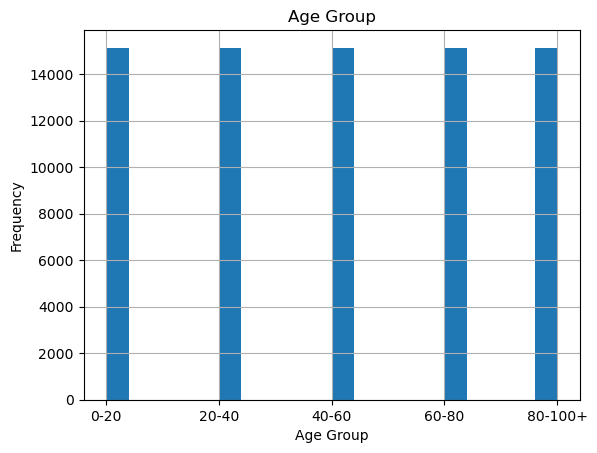

In [15]:
final_population_data['age_group'].hist(bins=20)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Age Group')
plt.show()

Very interesting, unique counts are even across all age groups. This is because the data in 'midyear_pop_5' is split across a 5 year age gap indicated by the columns 'starting_age' and 'ending_age' which show said age range. This is an even range across all of the countries and years which means that the frequency of each country will be equal as 20 seperate age gaps. As a result, when we aggregate our ages into the 5 groups, it combines these groups evenly

This is a violation of the assumption that the data may represents a continuous age distribution but instead shows our 5 year age groups.

### Historical + Projection Data Split ###

In [16]:
# Historical data (1950-2017)
historical_data = final_population_data.loc[final_population_data['year'].between(1950, 2017)]

# Future projections (2017-2050)
forecasted_data = final_population_data.loc[final_population_data['year'].between(2017, 2050)]

Splitting the dataset into historical and forecasted to keep statistics and plots in a proper format. 

In [17]:
print("Historical Data (1950-2017):")
print(historical_data.head())
print("Shape:", historical_data.shape)
print("Year Range:", historical_data['year'].min(), "-", historical_data['year'].max())

# Distribution of categorical variables
print("\nDistribution of Countries:")
print(historical_data['country_name'].value_counts())

print("\nDistribution of Age Groups:")
print(historical_data['age_group'].value_counts())

# Checking for missing values
print("\nMissing Values:")
print(historical_data.isnull().sum())

Historical Data (1950-2017):
  country_code country_name  year age_group  midyear_population  \
0           AA        Aruba  1981      0-20               22037   
1           AA        Aruba  1981     20-40               20920   
2           AA        Aruba  1981     40-60               11577   
3           AA        Aruba  1981     60-80                5050   
4           AA        Aruba  1981   80-100+                 722   

   midyear_population_male  midyear_population_female  country_area  \
0                    11246                      10791         180.0   
1                    10109                      10811         180.0   
2                     5460                       6117         180.0   
3                     2256                       2794         180.0   
4                      260                        462         180.0   

      region  population_density  
0  Caribbean          122.427778  
1  Caribbean          116.222222  
2  Caribbean           64.316667  
3

In [18]:
print("Forecasted Data(2017-2050):")
print(forecasted_data.head())
print("Shape:", forecasted_data.shape)
print("Year Range:", forecasted_data['year'].min(), "-", forecasted_data['year'].max())

# Distribution of categorical variables
print("\nDistribution of Countries:")
print(forecasted_data['country_name'].value_counts())

print("\nDistribution of Age Groups:")
print(forecasted_data['age_group'].value_counts())

# Checking for missing values
print("\nMissing Values:")
print(forecasted_data.isnull().sum())

Forecasted Data(2017-2050):
    country_code country_name  year age_group  midyear_population  \
180           AA        Aruba  2017      0-20               27220   
181           AA        Aruba  2017     20-40               31419   
182           AA        Aruba  2017     40-60               33317   
183           AA        Aruba  2017     60-80               20338   
184           AA        Aruba  2017   80-100+                2821   

     midyear_population_male  midyear_population_female  country_area  \
180                    13659                      13561         180.0   
181                    15472                      15947         180.0   
182                    15870                      17447         180.0   
183                     8574                      11764         180.0   
184                      931                       1890         180.0   

        region  population_density  
180  Caribbean          151.222222  
181  Caribbean          174.550000  
182  Ca

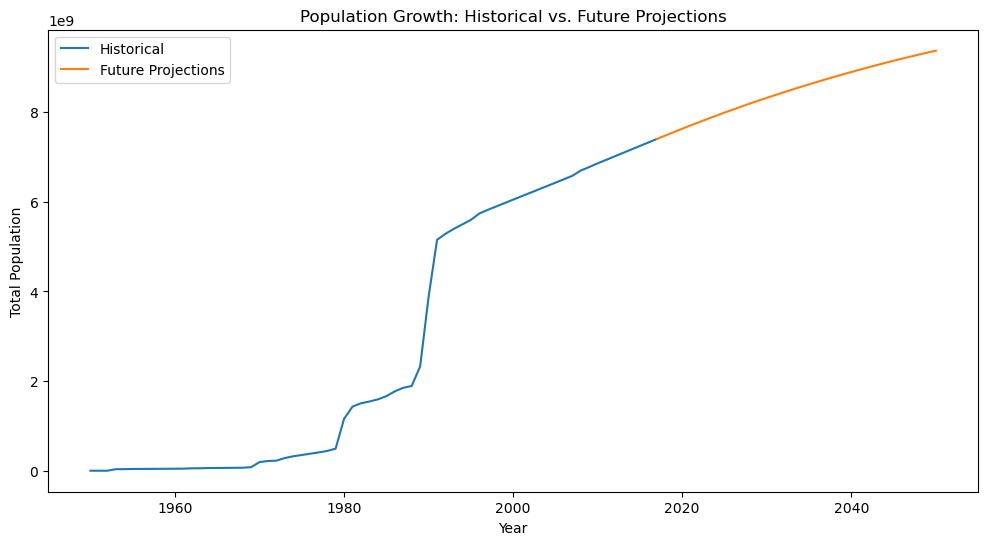

In [19]:
# population by year for historical data
historical_pop_by_year = historical_data.groupby('year')['midyear_population'].sum().reset_index()

# population by year for future projections
future_pop_by_year = forecasted_data.groupby('year')['midyear_population'].sum().reset_index()

# Combine historical and future data
combined_pop_by_year = pd.concat([historical_pop_by_year, future_pop_by_year])

plt.figure(figsize=(12, 6))
plt.plot(historical_pop_by_year['year'], historical_pop_by_year['midyear_population'], label='Historical')
plt.plot(future_pop_by_year['year'], future_pop_by_year['midyear_population'], label='Future Projections')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Growth: Historical vs. Future Projections')
plt.legend()
plt.show()

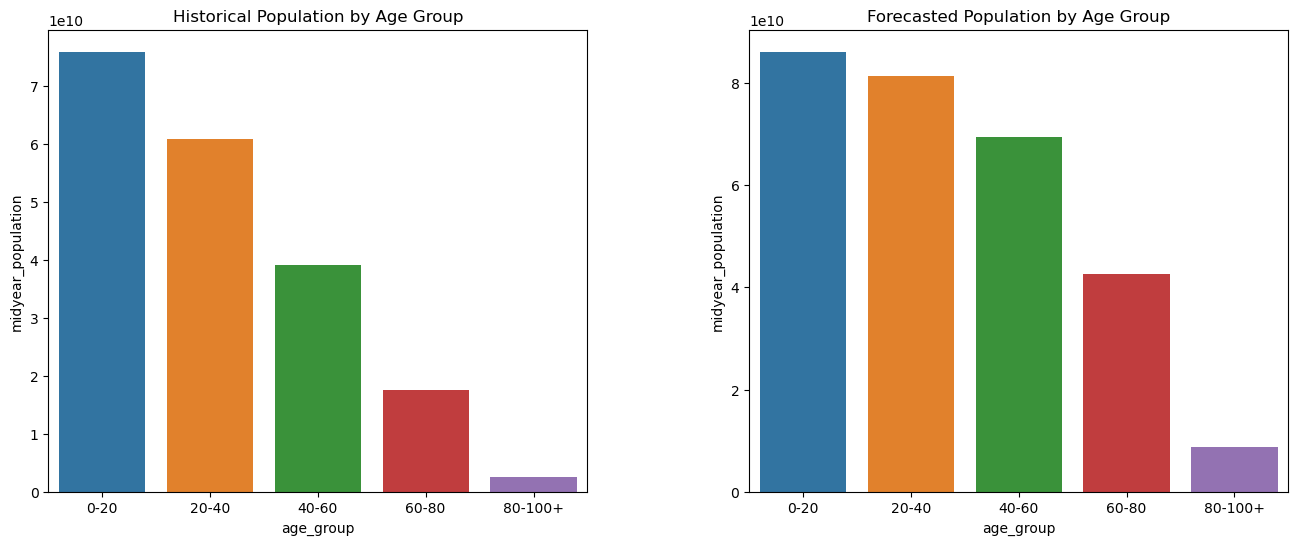

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar plot for historical population by age group
historical_age_pop = historical_data.groupby('age_group')['midyear_population'].sum().reset_index()

ax1.set_title("Historical Population by Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Midyear Population")
sns.barplot(data=historical_age_pop, x='age_group', y='midyear_population', ax=ax1)

# Bar plot for forecasted population by age group
forecasted_age_pop = forecasted_data.groupby('age_group')['midyear_population'].sum().reset_index()

ax2.set_title("Forecasted Population by Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Midyear Population")
sns.barplot(data=forecasted_age_pop, x='age_group', y='midyear_population', ax=ax2)
plt.subplots_adjust(wspace=0.3)
plt.show()

#### Population Growth by Region and Year ####

In [21]:
# Aggregating data by region and year
print("\nHistorical Population by Region and Year:")
region_year_pop_historical = historical_data.groupby(['region', 'year'])['midyear_population'].sum().reset_index()
print(region_year_pop_historical.head())

#forecast agg.
region_year_pop_forecast = forecasted_data.groupby(['region', 'year'])['midyear_population'].sum().reset_index()

# pivot tables by age group and year + combining data
print("\nHistorical Population by Age Group and Year:")
age_year_pop_historical = historical_data.pivot_table(index='age_group', columns='year', values='midyear_population', aggfunc='sum')
print(age_year_pop_historical.head())

#forecast pivot
age_year_pop_forecast = forecasted_data.pivot_table(index='age_group', columns='year', values='midyear_population', aggfunc='sum')

combined_pop_data = pd.concat([region_year_pop_historical, region_year_pop_forecast])


# correlation matrix's data
print("\nCorrelation Matrix (Historical Data):")
corr_matrix_historical = historical_data[['midyear_population', 'midyear_population_male', 'midyear_population_female', 'population_density']].corr()
print(corr_matrix_historical)

print("\nCorrelation Matrix (Forecasted Data):")
corr_matrix_forecast = forecasted_data[['midyear_population', 'midyear_population_male', 'midyear_population_female', 'population_density']].corr()
print(corr_matrix_forecast)


Historical Population by Region and Year:
                   region  year  midyear_population
0  Africa and Middle East  1950               79248
1  Africa and Middle East  1951               81331
2  Africa and Middle East  1952               83476
3  Africa and Middle East  1953            34030288
4  Africa and Middle East  1954            35022180

Historical Population by Age Group and Year:
year         1950    1951    1952      1953      1954      1955      1956  \
age_group                                                                   
0-20       128225  131485  134867  19144730  19688144  21694150  22298579   
20-40       69033   70876   72765   9362542   9653989  10756452  11074838   
40-60       34410   35329   36265   4282959   4405104   4940188   5076467   
60-80       10762   11047   11349   1342805   1380335   1544630   1586703   
80-100+       602     618     630     74153     76135     82781     84971   

year           1957      1958      1959  ...        2008   

Aggregating data by region and year to provide a "population data set" for both historical + population data. 
combined_pop_data -> region, year, midyear_population

Total midyear population is strongly positively correlated with both the male and female midyear populations, as expected (this ensures data is aggregated correctly). This means that as the total population changes, the male and female populations tend to increase or decrease in a similar way.

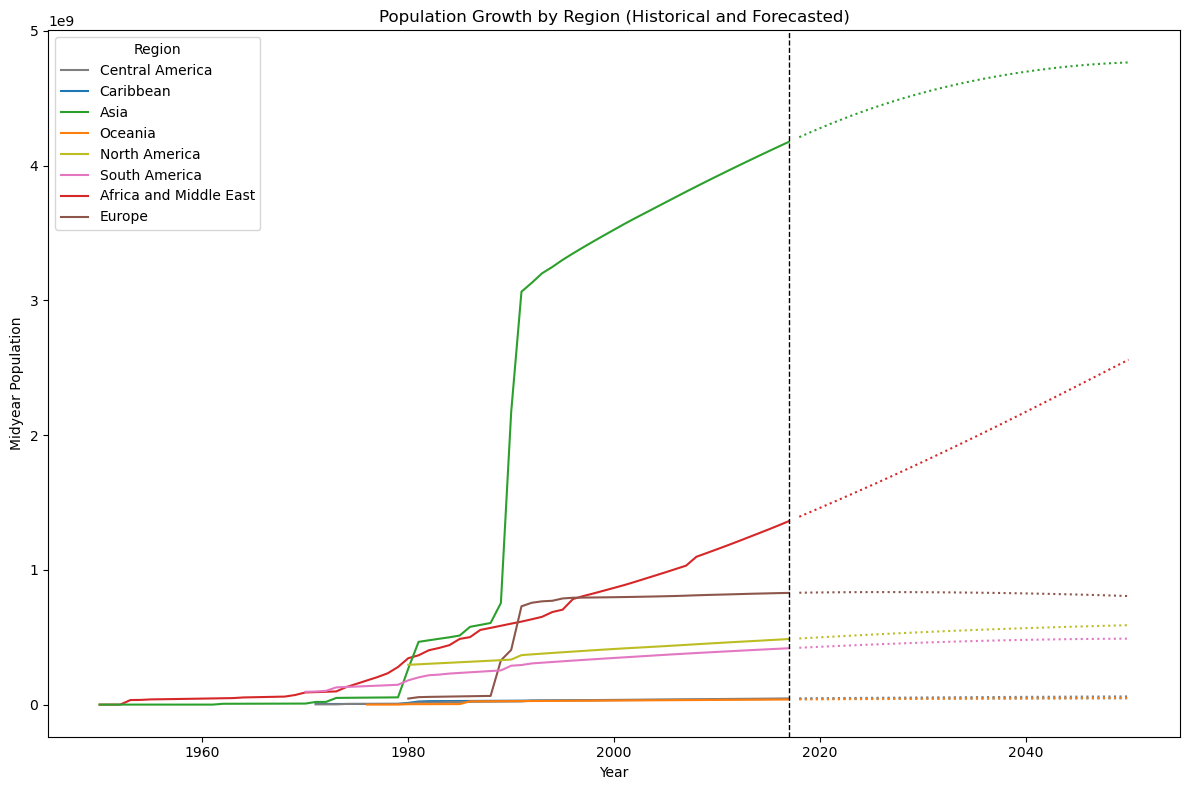

In [22]:
#mapping regions to colors
color_map = {
    'Africa and Middle East': 'tab:red',
    'Asia': 'tab:green',
    'Caribbean': 'tab:blue',
    'Central America': 'tab:gray',
    'Europe': 'tab:brown',
    'North America': 'tab:olive',
    'Oceania': 'tab:orange',
    'South America': 'tab:pink'
}

fig, ax = plt.subplots(figsize=(12, 8))

# historical data
for region in combined_pop_data['region'].unique():
    data = combined_pop_data[(combined_pop_data['region'] == region) & (combined_pop_data['year'] <= 2017)]
    region_color = color_map[region]
    ax.plot(data['year'], data['midyear_population'], label=region, linestyle='solid', color=region_color)

# forecasted data
for region in combined_pop_data['region'].unique():
    data = combined_pop_data[(combined_pop_data['region'] == region) & (combined_pop_data['year'] > 2017)]
    region_color = color_map[region]
    ax.plot(data['year'], data['midyear_population'], label='_nolegend_', linestyle=':', color=region_color)

# adding vertical line to separate historical and forecasted data
ax.axvline(x=2017, color='black', linestyle='--', linewidth=1)

ax.set_xlabel('Year')
ax.set_ylabel('Midyear Population')
ax.set_title('Population Growth by Region (Historical and Forecasted)')

handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

ax.legend(unique_handles, unique_labels, title='Region', loc='upper left')

plt.tight_layout()
plt.show()

#### Population Density by Region and Year ####

In [23]:
# Aggregate population density by region and year
density_region_year_historical = historical_data.groupby(['region', 'year'])['population_density'].mean().reset_index()
density_region_year_forecast = forecasted_data.groupby(['region', 'year'])['population_density'].mean().reset_index()

# Combining historical and forecasted data
combined_density_data = pd.concat([density_region_year_historical, density_region_year_forecast])

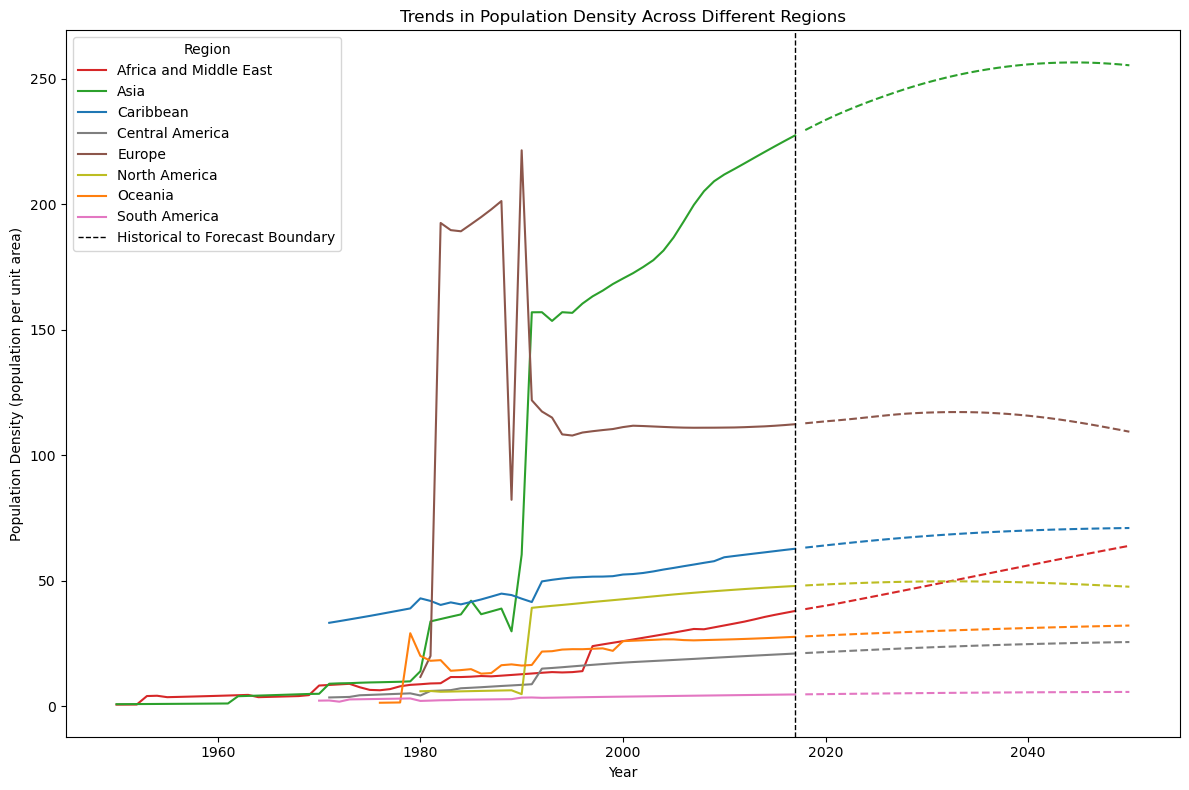

In [24]:
# Plotting the population density over time
fig, ax = plt.subplots(figsize=(12, 8))
for region in combined_density_data['region'].unique():
    region_data_hist = combined_density_data[(combined_density_data['region'] == region) & (combined_density_data['year'] <= 2017)]
    region_data_fore = combined_density_data[(combined_density_data['region'] == region) & (combined_density_data['year'] > 2017)]
    ax.plot(region_data_hist['year'], region_data_hist['population_density'], label=region, linestyle='-', color=color_map.get(region, 'gray'))
    ax.plot(region_data_fore['year'], region_data_fore['population_density'], label='_nolegend_', linestyle='--', color=color_map.get(region, 'gray'))

ax.axvline(x=2017, color='black', linestyle='--', linewidth=1, label='Historical to Forecast Boundary')
ax.set_xlabel('Year')
ax.set_ylabel('Population Density (population per unit area)')
ax.set_title('Trends in Population Density Across Different Regions')
ax.legend(title='Region', loc='upper left')
plt.tight_layout()
plt.show()

#### Combining birth rate, fertility and mortality data ####

In [25]:
pd.read_csv('data/country_names_area.csv')
# only taking country_are
pd.read_csv('data/midyear_population_5yr_age_sex.csv')
pd.read_csv('data/midyear_population.csv')

births = pd.read_csv('data/birth_death_growth_rates.csv')
fertility = pd.read_csv('data/age_specific_fertility_rates.csv')
# Taking gross repro rate 3 ranges
mortality = pd.read_csv('data/mortality_life_expectancy.csv')
# taking out 0 to 4 mortality
mortality.drop(['mortality_rate_1to4', 'mortality_rate_1to4_male', 'mortality_rate_1to4_female'], axis=1, inplace=True)
fertility.drop('gross_reproduction_rate',axis=1, inplace=True)
pop_changes = pd.merge(fertility, births, on = ['country_code', 'country_name', 'year'], how = 'left')

pop_changes = pd.merge(pop_changes, mortality, on = ['country_code', 'country_name', 'year'], how = 'left')
pop_changes['fertility_rate_40+'] = pop_changes['fertility_rate_40_44'] + pop_changes['fertility_rate_45_49']
pop_changes['fertility_rate_20_to_40'] = pop_changes['fertility_rate_20_24'] + pop_changes['fertility_rate_25_29'] + pop_changes['fertility_rate_30_34'] + pop_changes['fertility_rate_35_39']
pop_changes['fertility_rate_Under_20'] = pop_changes['fertility_rate_15_19']
pop_changes_final = pop_changes.drop(['fertility_rate_15_19','fertility_rate_20_24', 'fertility_rate_25_29', 'fertility_rate_30_34',
       'fertility_rate_35_39', 'fertility_rate_40_44', 'fertility_rate_45_49'], axis=1)

In [26]:
merged_all_data = pd.merge(pop_changes_final, final_population_data, on=['country_code', 'country_name', 'year'])

In [27]:
merged_all_data.columns

Index(['country_code', 'country_name', 'year', 'total_fertility_rate',
       'sex_ratio_at_birth', 'crude_birth_rate', 'crude_death_rate',
       'net_migration', 'rate_natural_increase', 'growth_rate',
       'infant_mortality', 'infant_mortality_male', 'infant_mortality_female',
       'life_expectancy', 'life_expectancy_male', 'life_expectancy_female',
       'mortality_rate_under5', 'mortality_rate_under5_male',
       'mortality_rate_under5_female', 'fertility_rate_40+',
       'fertility_rate_20_to_40', 'fertility_rate_Under_20', 'age_group',
       'midyear_population', 'midyear_population_male',
       'midyear_population_female', 'country_area', 'region',
       'population_density'],
      dtype='object')

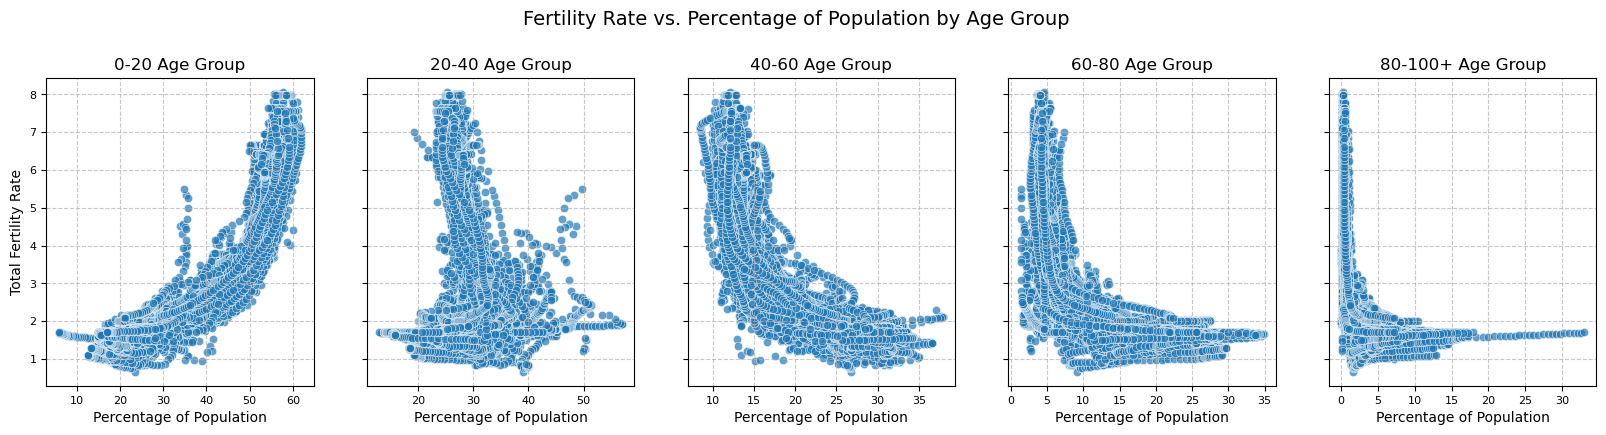

In [28]:
age_groups = ['0-20', '20-40', '40-60', '60-80', '80-100+']

fig, axes = plt.subplots(1, len(age_groups), figsize=(20, 4), sharey=True)

for j, age_group in enumerate(age_groups):
    # percentage of population in each age group
    merged_all_data[f'pct_{age_group}'] = merged_all_data['midyear_population'] / merged_all_data.groupby(['country_name', 'year'])['midyear_population'].transform('sum') * 100
    
    sns.scatterplot(data=merged_all_data[merged_all_data['age_group'] == age_group], x=f'pct_{age_group}', y='total_fertility_rate', alpha=0.7, ax=axes[j])
    
    axes[j].set_title(f'{age_group} Age Group', fontsize=12)
    axes[j].set_xlabel(f'Percentage of Population', fontsize=10)
    if j == 0:
        axes[j].set_ylabel('Total Fertility Rate', fontsize=10)
    axes[j].grid(True, linestyle='--', alpha=0.7)
    axes[j].tick_params(labelsize=8)

plt.subplots_adjust(wspace=0.2)
fig.suptitle('Fertility Rate vs. Percentage of Population by Age Group', fontsize=14, y=1.05)
plt.show()

The 0-20 age group shows a relatively narrow range of fertility rates concentrated around lower values likely representing populations with low birth rates among children and teenagers. The 20-40 age group exhibits a wider range of fertility rates, with a dense concentration of points indicating higher fertility rates as expected since most people have kids around this age. The 40-60 age group shows a similar pattern to the 20-40 group but shows the gradual decline in fertility with age. This pattern continues with the 60+ age groups.

Overall, these plots highlight the strong relationship between age and fertility, with fertility rates peaking in the 20-40 age group and declining sharply in older age groups. The patterns observed in these plots align with the expected demographic trends in populations with varying age distributions.

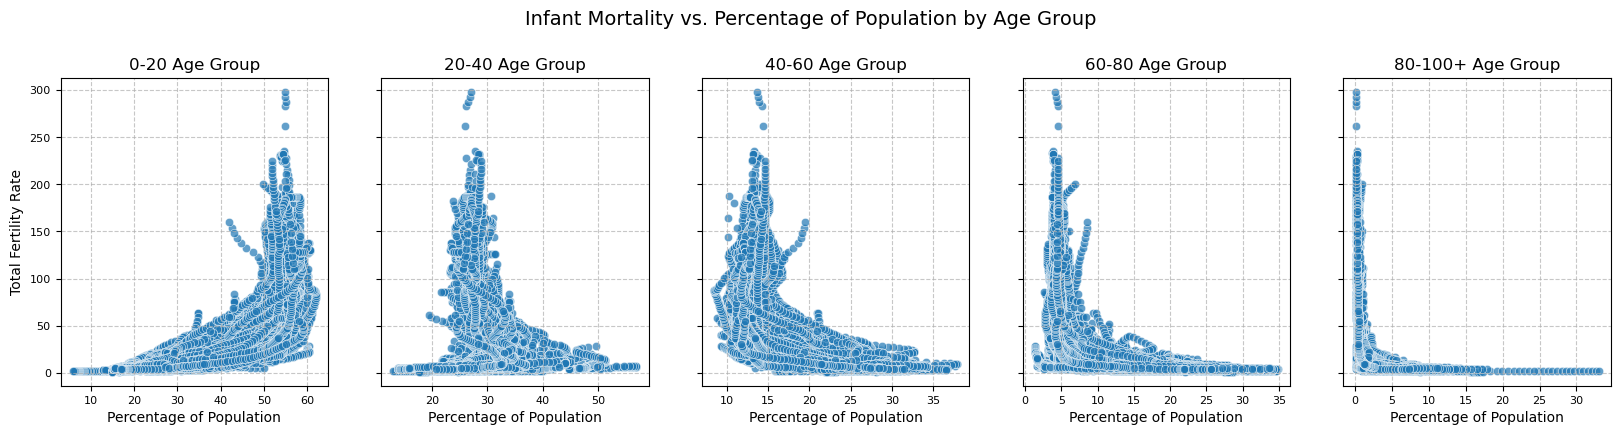

In [29]:
age_groups = ['0-20', '20-40', '40-60', '60-80', '80-100+']

fig, axes = plt.subplots(1, len(age_groups), figsize=(20, 4), sharey=True)

for j, age_group in enumerate(age_groups):
    # percentage of population in each age group
    merged_all_data[f'pct_{age_group}'] = merged_all_data['midyear_population'] / merged_all_data.groupby(['country_name', 'year'])['midyear_population'].transform('sum') * 100
    
    sns.scatterplot(data=merged_all_data[merged_all_data['age_group'] == age_group], x=f'pct_{age_group}', y='infant_mortality', alpha=0.7, ax=axes[j])
    
    axes[j].set_title(f'{age_group} Age Group', fontsize=12)
    axes[j].set_xlabel(f'Percentage of Population', fontsize=10)
    if j == 0:
        axes[j].set_ylabel('Total Fertility Rate', fontsize=10)
    axes[j].grid(True, linestyle='--', alpha=0.7)
    axes[j].tick_params(labelsize=8)

plt.subplots_adjust(wspace=0.2)
fig.suptitle('Infant Mortality vs. Percentage of Population by Age Group', fontsize=14, y=1.05)
plt.show()

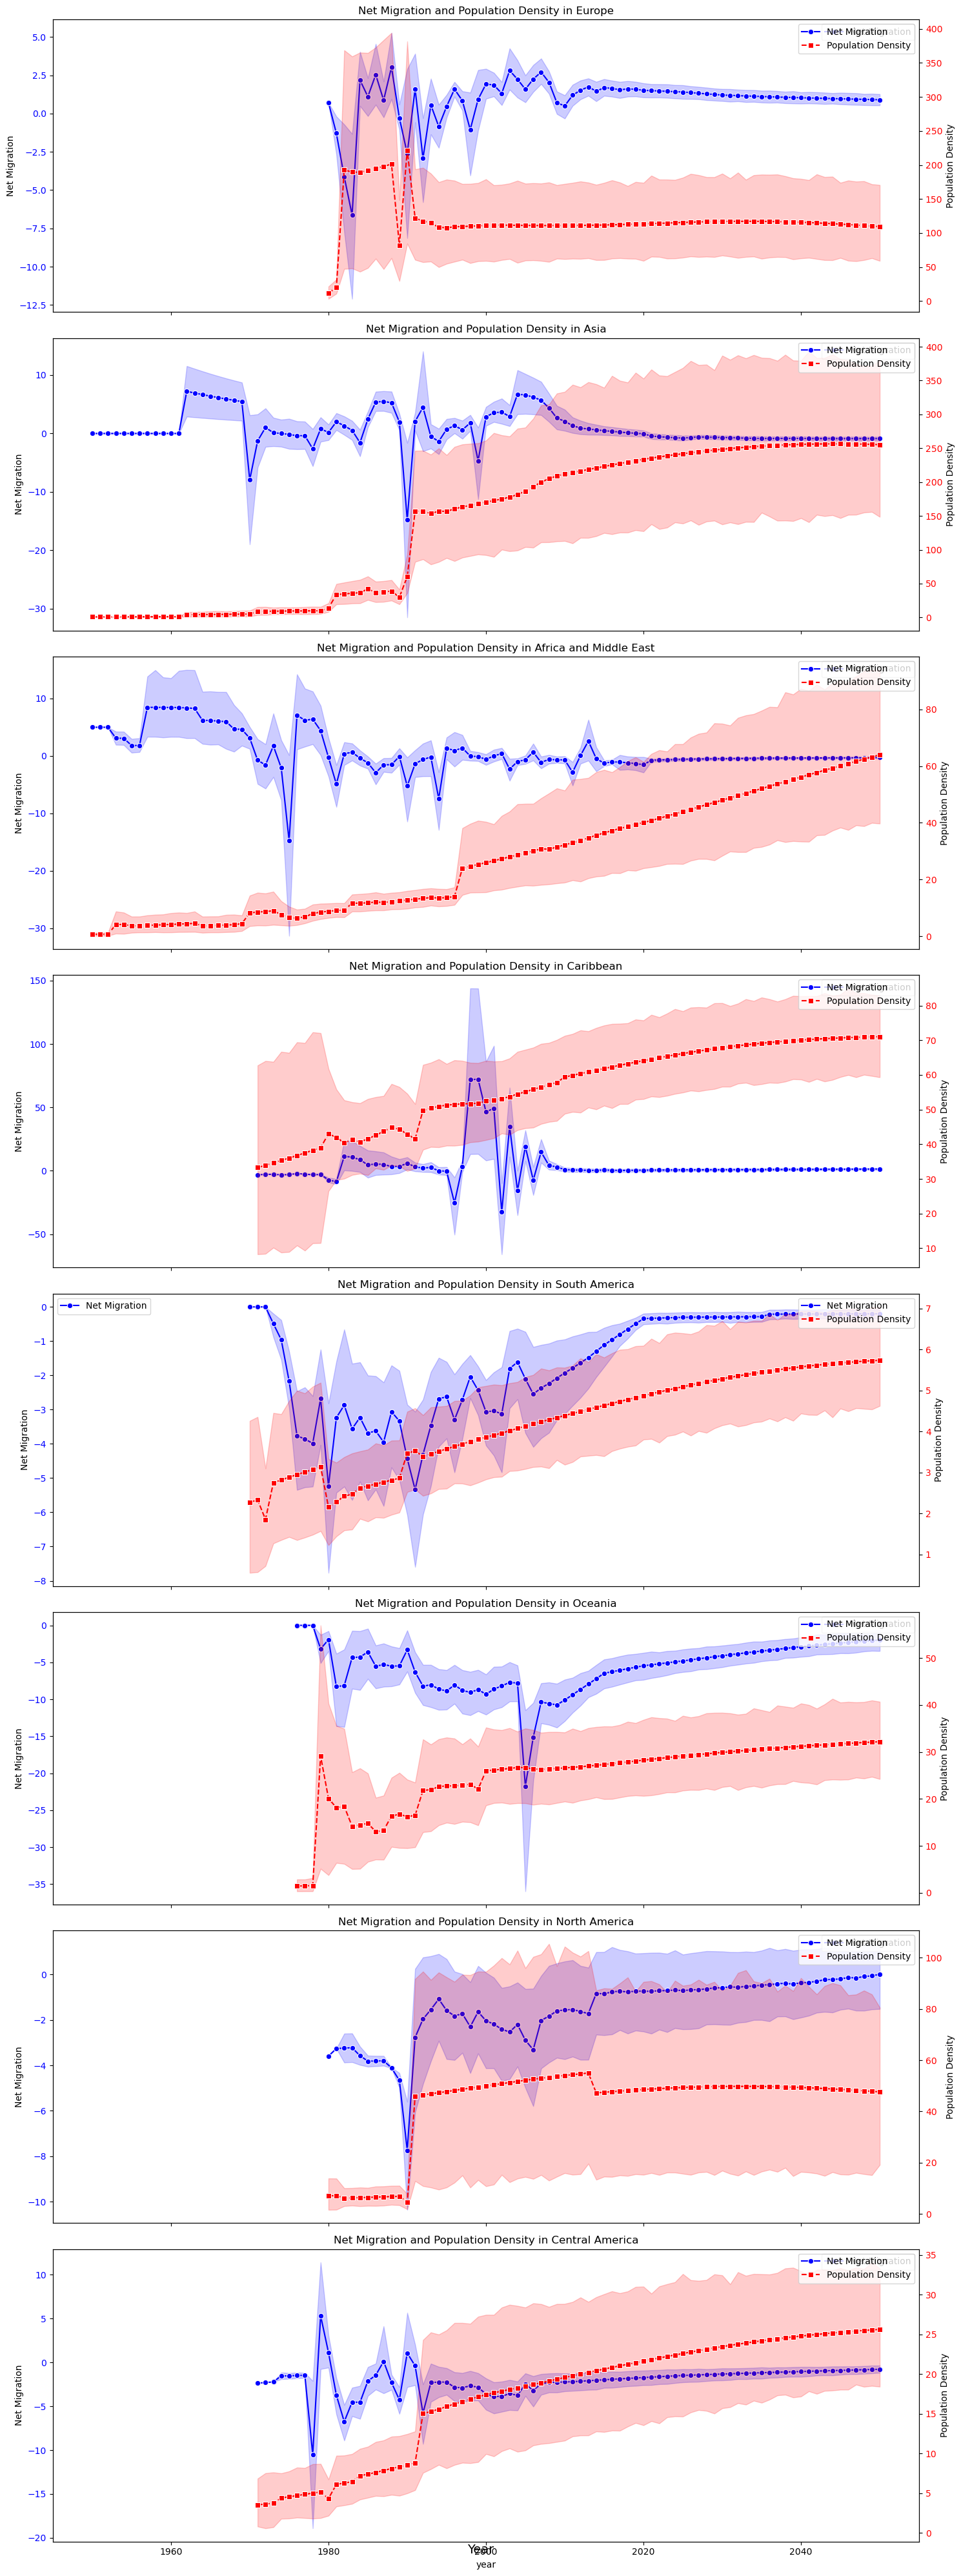

In [30]:
regions = merged_all_data['region'].unique()  # Extract unique regions

# Set up the subplot grid with one row per region
fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(15, 5 * len(regions)), sharex=True)

# Ensure 'axes' is an array, even if there is only one plot
if len(regions) == 1:
    axes = [axes]

# Iterate over each region and create a plot
for ax, region in zip(axes, regions):
    region_data = merged_all_data[merged_all_data['region'] == region]

        # First y-axis for Net Migration
    sns.lineplot(data=region_data, x='year', y='net_migration', ax=ax, color='blue', marker="o", label='Net Migration')
    ax.set_title(f'Net Migration and Population Density in {region}')
    ax.set_ylabel('Net Migration')
    ax.tick_params(axis='y', labelcolor='blue')
        
        # Create a second y-axis for Population Density
    ax2 = ax.twinx()
    sns.lineplot(data=region_data, x='year', y='population_density', ax=ax2, color='red', linestyle='--', marker="s", label='Population Density')
    ax2.set_ylabel('Population Density')
    ax2.tick_params(axis='y', labelcolor='red')

        # Managing legends
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')
    
fig.tight_layout()
fig.text(0.5, 0.01, 'Year', ha='center', fontsize=14)
plt.show()